#### Data source: https://www2.census.gov/programs-surveys/economic-census/data/2017/sector31/

In [70]:
import pandas as pd
import sklearn as sl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from pprint import pprint
from collections import Counter

In [71]:
uscensus = pd.read_table('./data/EC1731BASIC.dat', delimiter = '|')

desc_table = uscensus.describe()

numeric_variables = [i for i, v in desc_table.loc['std'].items() if v != 0 and not pd.isna(v)]
desc_table[numeric_variables]

,FIRM,ESTAB,RCPTOT,PAYANN,PAYQTR1,EMP,EMPQ1PW,EMPQ2PW,EMPQ3PW,EMPQ4PW,...,PCHCMPQ,PCHEXSO,PCHDAPR,PCHCSVC,PCHRPR,PCHRFUS,PCHADVT,PCHPRTE,PCHTAX,PCHOEXP
count,648.000000,648.000000,6.480000e+02,6.480000e+02,6.480000e+02,6.480000e+02,6.480000e+02,6.480000e+02,6.480000e+02,6.480000e+02,...,6.480000e+02,6.480000e+02,6.480000e+02,6.480000e+02,6.480000e+02,6.480000e+02,6.480000e+02,6.480000e+02,6.480000e+02,6.480000e+02
mean,1966.131173,2247.399691,4.311701e+07,5.173661e+06,1.300698e+06,8.918195e+04,6.333698e+04,6.392410e+04,6.405389e+04,6.400232e+04,...,4.286515e+04,3.641139e+04,4.586119e+04,4.205395e+04,4.069474e+05,1.125700e+05,1.363600e+05,2.651055e+05,1.536622e+05,1.426071e+06
std,10405.598993,12086.994444,2.331680e+08,2.753501e+07,6.931033e+06,4.733694e+05,3.368480e+05,3.399539e+05,3.406902e+05,3.404218e+05,...,2.324450e+05,2.014968e+05,2.937273e+05,2.242076e+05,2.211267e+06,6.381379e+05,7.731779e+05,1.458714e+06,8.337911e+05,7.589059e+06
min,8.000000,10.000000,2.752570e+05,3.448700e+04,8.270000e+03,5.230000e+02,3.020000e+02,3.010000e+02,3.080000e+02,3.030000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.360000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.915000e+03
25%,195.000000,244.000000,5.275142e+06,7.585158e+05,1.845542e+05,1.330475e+04,9.652000e+03,9.834500e+03,1.006275e+04,9.989000e+03,...,4.174000e+03,2.979000e+03,3.235000e+03,5.767250e+03,4.310125e+04,9.865000e+03,9.255250e+03,2.844425e+04,1.865475e+04,1.997882e+05
50%,457.000000,549.000000,1.124193e+07,1.526702e+06,3.771965e+05,2.952100e+04,2.071150e+04,2.084400e+04,2.117200e+04,2.119150e+04,...,9.878500e+03,7.833000e+03,7.636500e+03,1.279100e+04,9.673950e+04,2.301300e+04,2.566700e+04,6.304000e+04,3.879600e+04,4.218870e+05
75%,1243.750000,1438.000000,3.147620e+07,3.717974e+06,9.108240e+05,6.697400e+04,4.641900e+04,4.699150e+04,4.686900e+04,4.718925e+04,...,2.696075e+04,2.185000e+04,2.110200e+04,3.036300e+04,2.651455e+05,6.240500e+04,7.621750e+04,1.706665e+05,1.062682e+05,1.084319e+06
max,248599.000000,291263.000000,5.587964e+09,6.705064e+08,1.685704e+08,1.155798e+07,8.208472e+06,8.284564e+06,8.301384e+06,8.294701e+06,...,5.575260e+06,4.759092e+06,5.958240e+06,5.457975e+06,5.274039e+07,1.461122e+07,1.805419e+07,3.436832e+07,1.991819e+07,1.848188e+08


TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.

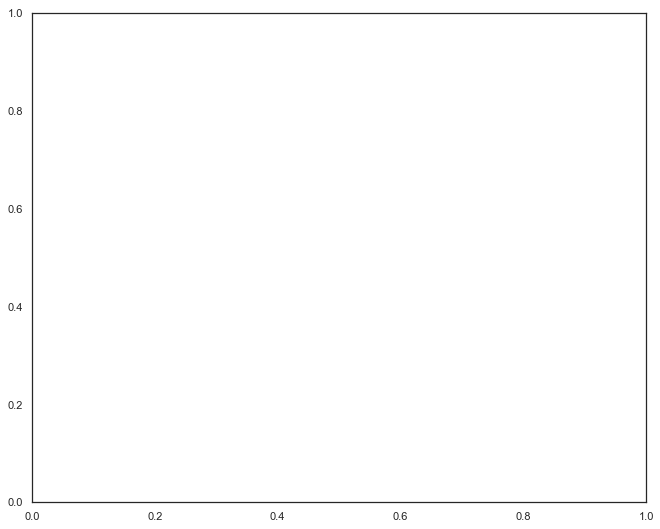

In [69]:
sns.set(style="white")
corr = np.corrcoef(uscensus[numeric_variables])
mask = np.triu(corr)
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})